## EDA по данным риелторской компании

В файле clients.csv предоставлена информация о клиентах риелторской компании США за один месяц. Вам необходимо как специалисту по Data Science сделать следующее:

- Провести разведочный анализ данных, посмотреть на датасет, есть ли пропуски - посмотреть на зависимости признаков
- Используя данные о выборке, постройте типичный портрет целевого клиента компании (пол, возраст, какой тип квартиры он приобретает, какова площадь в кв. м , каков средний чек, цель покупки, источник лида (погуглите что такое лид в маркетинге, за это отвечает колонка Source).

Таким образом после вашего анализа, я хочу увидеть описание нашего целевого клиента с соответствующими визуализациями. Ожидаю увидеть как минимум 5 графиков с комментариями. Отнеситесь к заданию достойно, представьте, что от Вашего отчета зависит принятие важного решения.

---

**Баллы могут быть снижены** за качество кода - старайтесь чтобы код был максимально лаконичным. Названия переменных (если они используются) должны отражать максимальную ее сущность.

**Комментарии по сдаче практического задания**:
1. Залить в репу на github в папку module_2/descriptive_stats
2. Ссылку на репо отправлять мне на почту alexadevv@gmail.com не позднее дедлайна.
3. Тема письма: Домашнее задание по модулю 2 <Фамилия Имя>
4. После дедлайна, неотправленные на почту задания, оцениваются максимум в 7 баллов.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('clients.csv')

In [3]:
# Смотрим базовую информацию
df.head()

,ID,Building,Year of sale,Month of sale,Type of property,Property number,Area (ft.),Price,Status,Customer ID,...,Y,M,D,Gender,Country,State,Purpose,Deal satisfaction,Mortgage,Source
0,1030,1,2005,11,Apartment,30,743.09,"$ 246,172.68",Sold,C0028,...,1986.0,6.0,21.0,F,USA,California,Home,5,No,Website
1,1029,1,2005,10,Apartment,29,756.21,"$ 246,331.90",Sold,C0027,...,1983.0,2.0,24.0,F,USA,California,Home,5,No,Website
2,2002,2,2007,7,Apartment,2,587.28,"$ 209,280.91",Sold,C0112,...,1985.0,12.0,27.0,M,USA,California,Home,1,Yes,Client
3,2031,2,2007,12,Apartment,31,1604.75,"$ 452,667.01",Sold,C0160,...,1985.0,12.0,27.0,M,USA,California,Investment,3,Yes,Website
4,1049,1,2004,11,Apartment,49,1375.45,"$ 467,083.31",Sold,C0014,...,1979.0,5.0,15.0,F,USA,California,Home,4,No,Agency


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       195 non-null    int64  
 1   Building                 195 non-null    int64  
 2   Year of sale             195 non-null    int64  
 3   Month of sale            195 non-null    int64  
 4   Type of property         195 non-null    object 
 5   Property number          195 non-null    int64  
 6   Area (ft.)               195 non-null    float64
 7   Price                    195 non-null    object 
 8   Status                   195 non-null    object 
 9   Customer ID              195 non-null    object 
 10  Entity                   195 non-null    object 
 11  Name                     195 non-null    object 
 12  Surname                  195 non-null    object 
 13  Age at time of purchase  178 non-null    float64
 14  Age Interval             1

In [5]:
df.columns

Index(['ID', 'Building', 'Year of sale', 'Month of sale', 'Type of property',
       'Property number', 'Area (ft.)', 'Price', 'Status', 'Customer ID',
       'Entity', 'Name', 'Surname', 'Age at time of purchase', 'Age Interval ',
       'Y', 'M', 'D', 'Gender', 'Country', 'State', 'Purpose',
       'Deal satisfaction', 'Mortgage', 'Source'],
      dtype='object')

In [6]:
df = df.rename(columns={'Year of sale': 'Year_of_sale', 'Month of sale': 'Month_of_sale', 
                        'Type of property': 'Type_of_property', 'Property number': 'Property_number', 
                        'Area (ft.)': 'Area_ft', 'Customer ID': 'CustomerID',
                        'Age at time of purchase': 'Age_purchase', 'Age Interval ': 'Age_interval',
                        'Deal satisfaction': 'Deal_satisfaction'})

In [7]:
df.describe(include="all")

,ID,Building,Year_of_sale,Month_of_sale,Type_of_property,Property_number,Area_ft,Price,Status,CustomerID,...,Y,M,D,Gender,Country,State,Purpose,Deal_satisfaction,Mortgage,Source
count,195.000000,195.000000,195.000000,195.000000,195,195.000000,195.000000,195,195,195,...,178.000000,178.000000,178.000000,178,195,181,195,195.000000,195,195
unique,NaN,NaN,NaN,NaN,2,NaN,NaN,194,1,162,...,NaN,NaN,NaN,2,9,9,2,NaN,2,3
top,NaN,NaN,NaN,NaN,Apartment,NaN,NaN,"$ 460,001.26",Sold,C0174,...,NaN,NaN,NaN,M,USA,California,Home,NaN,No,Website
freq,NaN,NaN,NaN,NaN,188,NaN,NaN,2,195,9,...,NaN,NaN,NaN,108,165,119,119,NaN,134,119
mean,2591.425641,2.564103,2006.333333,7.271795,NaN,27.328205,899.867128,NaN,NaN,NaN,...,1960.325843,6.752809,15.449438,NaN,NaN,NaN,NaN,3.605128,NaN,NaN
std,1244.617996,1.243434,1.072941,3.378674,NaN,14.830832,261.489550,NaN,NaN,NaN,...,12.835575,3.450312,8.457285,NaN,NaN,NaN,NaN,1.363355,NaN,NaN
min,1002.000000,1.000000,2004.000000,1.000000,NaN,1.000000,410.710000,NaN,NaN,NaN,...,1931.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN
25%,2003.500000,2.000000,2006.000000,4.000000,NaN,15.000000,739.860000,NaN,NaN,NaN,...,1950.250000,4.000000,8.000000,NaN,NaN,NaN,NaN,3.000000,NaN,NaN
50%,2054.000000,2.000000,2007.000000,8.000000,NaN,27.000000,785.480000,NaN,NaN,NaN,...,1962.000000,6.000000,15.000000,NaN,NaN,NaN,NaN,4.000000,NaN,NaN
75%,3048.500000,3.000000,2007.000000,10.000000,NaN,39.000000,1075.460000,NaN,NaN,NaN,...,1969.750000,9.750000,23.750000,NaN,NaN,NaN,NaN,5.000000,NaN,NaN


In [8]:
# Проверим пропуски
na_count = df.isna().sum()
na_frac = df.isna().mean()

pd.concat([na_count, na_frac], axis=1, keys=["n_missing", "frac_missing"])

,n_missing,frac_missing
ID,0,0.000000
Building,0,0.000000
Year_of_sale,0,0.000000
Month_of_sale,0,0.000000
Type_of_property,0,0.000000
Property_number,0,0.000000
Area_ft,0,0.000000
Price,0,0.000000
Status,0,0.000000
CustomerID,0,0.000000


<font color=#5D76D9>В таблице есть пропуски в столбцах 'Age_purchase', 'Age_interval', 'Y', 'M', 'D', 'Gender', 'State'. Их доля не превышает 1–2% от общего числа строк, поэтому для текущей задачи разведочного анализа данных они не критичны.<font/>

In [9]:
# Проверим количество уникальных значений
data = []

for col in df.columns:
    unique_values = df[col].unique()
    num_unique = len(unique_values)
    data.append({"col": col, "num_unique": num_unique})

result = pd.DataFrame(data)
print(result)
    

                  col  num_unique
0                  ID         194
1            Building           5
2        Year_of_sale           6
3       Month_of_sale          12
4    Type_of_property           2
5     Property_number          58
6             Area_ft          75
7               Price         194
8              Status           1
9          CustomerID         162
10             Entity           2
11               Name         159
12            Surname         156
13       Age_purchase          47
14       Age_interval           7
15                  Y          51
16                  M          14
17                  D          32
18             Gender           3
19            Country           9
20              State          10
21            Purpose           2
22  Deal_satisfaction           5
23           Mortgage           2
24             Source           3


In [10]:
df['Status'].unique()

array([' Sold '], dtype=object)

<font color=#5D76D9>Столбец **'Status'** содержит только одно значение *'Sold'* для всех наблюдений и не даёт дополнительной информации для анализа портрета клиента. В связи с этим признак не несёт вариативности и его можно удалить из датасета, чтобы не загромождать анализ лишними колонками.<font/>

In [11]:
# Удалим столбец 'Status'
df = df.drop('Status', axis=1)

In [12]:
# В столбце 'Price' убираем лишние запятые и символ $, приводим к типу float
df['Price'] = df['Price'].replace('[\$,]', '', regex=True).astype(float)

In [13]:
# Создадим площадь в квадратных метрах
# 1 квадратный фут ≈ 0.092903 квадратных метра:
df['Area_m2'] = df['Area_ft'] * 0.092903

In [14]:
# Выведем уникальные значения и подсчитаем количество столбцов в данных, если количество значений < 20
def print_unique(df):
       for col in df.columns:
        unique = df[col].unique()
        if len(unique) <20:
            print(f'{col:<20} ({len(unique)}): {unique}')
            
print_unique(df)

Building             (5): [1 2 3 4 5]
Year_of_sale         (6): [2005 2007 2004 2008 2006 2010]
Month_of_sale        (12): [11 10  7 12  9  1  6  3  8  4  5  2]
Type_of_property     (2): ['Apartment' 'Office']
Entity               (2): ['Individual' 'Firm']
Age_interval         (7): ['18-25' '26-35' '36-45' '46-55' '56-65' '65+' nan]
M                    (14): [ 6.  2. 12.  5.  8.  9.  1.  3. 10.  7.  4. 11. 15. nan]
Gender               (3): ['F' 'M' nan]
Country              (9): ['USA' 'UK' 'USA ' 'Belgium' 'Russia' 'Denmark' 'Germany' 'Mexico'
 'Canada']
State                (10): ['California' 'Virginia' 'Arizona' 'Oregon' 'Nevada' 'Colorado' 'Utah' nan
 'Kansas' 'Wyoming']
Purpose              (2): ['Home' 'Investment']
Deal_satisfaction    (5): [5 1 3 4 2]
Mortgage             (2): ['No' 'Yes']
Source               (3): ['Website' 'Client' 'Agency']


In [15]:
# Проверка сколько дублирующихся строк есть в таблице
df.duplicated().sum()

np.int64(0)

In [16]:
# Удалим столбец 'ID'
df = df.drop('ID', axis=1)

<font color=#5D76D9>Столбец 'ID' не даёт дополнительной информации для анализа портрета клиента. В связи с этим признак не несёт вариативности и его можно удалить из датасета, чтобы не загромождать анализ лишними колонками.<font/>

In [17]:
# Удаляем в столбце 'Country' лишние пробелы
df.Country = df.Country.str.strip()

<font color=#5D76D9>Столбец 'Country' содержит 'USA' и 'USA '.<font/>

In [18]:
df.describe()

,Building,Year_of_sale,Month_of_sale,Property_number,Area_ft,Price,Age_purchase,Y,M,D,Deal_satisfaction,Area_m2
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,178.000000,178.000000,178.000000,178.000000,195.000000,195.000000
mean,2.564103,2006.333333,7.271795,27.328205,899.867128,269434.560923,46.151685,1960.325843,6.752809,15.449438,3.605128,83.600356
std,1.243434,1.072941,3.378674,14.830832,261.489550,80129.094465,12.841692,12.835575,3.450312,8.457285,1.363355,24.293164
min,1.000000,2004.000000,1.000000,1.000000,410.710000,117564.070000,19.000000,1931.000000,1.000000,1.000000,1.000000,38.156191
25%,2.000000,2006.000000,4.000000,15.000000,739.860000,212393.250000,37.000000,1950.250000,4.000000,8.000000,3.000000,68.735214
50%,2.000000,2007.000000,8.000000,27.000000,785.480000,243052.590000,45.000000,1962.000000,6.000000,15.000000,4.000000,72.973448
75%,3.000000,2007.000000,10.000000,39.000000,1075.460000,308550.875000,55.000000,1969.750000,9.750000,23.750000,5.000000,99.913460
max,5.000000,2010.000000,12.000000,59.000000,1942.500000,529317.280000,76.000000,1986.000000,15.000000,31.000000,5.000000,180.464078


In [19]:
# В столбце 'M' имеет место ошибка, не может быть 15 месяцев в году.
df[df.M == 15]

,Building,Year_of_sale,Month_of_sale,Type_of_property,Property_number,Area_ft,Price,CustomerID,Entity,Name,...,M,D,Gender,Country,State,Purpose,Deal_satisfaction,Mortgage,Source,Area_m2
140,5,2007,11,Apartment,50,1093.0,390494.27,C0140,Individual,Aniya,...,15.0,2.0,F,USA,Nevada,Home,3,No,Website,101.542979


In [20]:
# Производим замену 15 на моду
df.loc[df['M'] == 15, 'M'] = df['M'].mode()[0]

In [21]:
# Выбираем строик с null значениями
df[df.isnull().any(axis=1)]

,Building,Year_of_sale,Month_of_sale,Type_of_property,Property_number,Area_ft,Price,CustomerID,Entity,Name,...,M,D,Gender,Country,State,Purpose,Deal_satisfaction,Mortgage,Source,Area_m2
41,1,2005,1,Apartment,32,782.25,215410.28,C0015,Individual,Lauryn,...,10.0,30.0,F,Belgium,NaN,Home,2,No,Agency,72.673372
58,2,2007,2,Apartment,25,927.83,315733.15,C0070,Individual,Aleksandra,...,6.0,13.0,F,Russia,NaN,Home,1,No,Agency,86.198190
64,2,2006,9,Apartment,5,785.48,257183.48,C0047,Individual,Alejandra,...,1.0,11.0,F,Denmark,NaN,Investment,1,No,Agency,72.973448
76,3,2007,4,Apartment,49,1283.45,338181.18,C0084,Individual,Diego,...,5.0,12.0,M,Mexico,NaN,Home,3,No,Agency,119.236355
114,2,2006,12,Apartment,3,927.08,289727.99,C0063,Individual,Piotr,...,12.0,2.0,M,Russia,NaN,Investment,3,No,Agency,86.128513
139,3,2006,11,Apartment,50,977.87,248274.31,C0059,Individual,Elena,...,6.0,22.0,F,Russia,NaN,Home,3,Yes,Agency,90.847057
146,2,2007,3,Apartment,19,649.80,177555.06,C0079,Individual,Xavier,...,5.0,24.0,M,Canada,NaN,Investment,5,No,Website,60.368369
147,2,2007,4,Apartment,21,785.48,217748.48,C0079,Individual,Xavier,...,5.0,24.0,M,Canada,NaN,Investment,5,No,Website,72.973448
148,2,2007,4,Apartment,27,785.48,247739.44,C0079,Individual,Xavier,...,5.0,24.0,M,Canada,NaN,Investment,5,No,Website,72.973448
149,2,2007,3,Apartment,52,1615.29,484458.03,C0079,Individual,Xavier,...,5.0,24.0,M,Canada,NaN,Investment,5,No,Website,150.065287


In [22]:
df.Entity.value_counts()

Entity
Individual    178
Firm           17
Name: count, dtype: int64

<font color=#5D76D9>Только для строк со значением 'Firm' столбца 'Entity' не заданы значения в столбцах 'Y', 'M', 'D', 'Gender', 'Age_interval', 'Age_purchase'.<font/>

In [23]:
# Посчитаем цену за м2
df['Price_m2'] = (df.Area_m2 / df.Price) * 1000.0

In [24]:
# Удалим из датасета столбец 'Area_ft' 
df=df.drop('Area_ft', axis=1)

<font color=#5D76D9>Для поставленной задачи нам требуется стоимость за м2 поэтому 'Area_ft' можно удалить из датасета, чтобы не загромождать анализ лишними колонками.<font/>

In [25]:
# Удалим из датасета столбец 'Property_number'
df = df.drop('Property_number', axis=1)

<font color=#5D76D9>Не совсем понятны значения столбца 'Property_number', при этом стоблдец не даёт дополнительной информации для анализа портрета клиента поэтому его можно удалить из датасета, чтобы не загромождать анализ лишними колонками.<font/>

In [26]:
# разделим df по значению столбца 'Entity'
df_firm = df[df.Entity == 'Firm']
df_individual = df[df.Entity == 'Individual']

In [27]:
df_firm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, 178 to 194
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Building           17 non-null     int64  
 1   Year_of_sale       17 non-null     int64  
 2   Month_of_sale      17 non-null     int64  
 3   Type_of_property   17 non-null     object 
 4   Price              17 non-null     float64
 5   CustomerID         17 non-null     object 
 6   Entity             17 non-null     object 
 7   Name               17 non-null     object 
 8   Surname            17 non-null     object 
 9   Age_purchase       0 non-null      float64
 10  Age_interval       0 non-null      object 
 11  Y                  0 non-null      float64
 12  M                  0 non-null      float64
 13  D                  0 non-null      float64
 14  Gender             0 non-null      object 
 15  Country            17 non-null     object 
 16  State              17 non-null

In [28]:
# Удалим столбцы с нулевыми значениями
df_firm = df_firm.drop('Age_purchase', axis=1)
df_firm = df_firm.drop('M', axis=1)
df_firm = df_firm.drop('D', axis=1)
df_firm = df_firm.drop('Y', axis=1)
df_firm = df_firm.drop('Gender', axis=1)
df_firm = df_firm.drop('Age_interval', axis=1)

In [29]:
# Удалим столбец 'Entity'
df_firm = df_firm.drop('Entity', axis=1)

<font color=#5D76D9>В df_firm уже все строки отфильтрованы по значению 'Firm'. Столбец 'Entity' больше не несёт новой информации (везде одно и то же значение), поэтому его можно убрать, чтобы не засорять данные.
.<font/>

In [30]:
# Проверим на уникальность значений
print_unique(df_firm)

Building             (2): [1 2]
Year_of_sale         (3): [2004 2005 2006]
Month_of_sale        (6): [ 3 11  9 12 10  7]
Type_of_property     (2): ['Office' 'Apartment']
Price                (17): [117564.07 317196.4  264142.16 222947.21 250312.53 246050.4  529317.28
 169158.29 206958.71 206445.42 239341.58 398903.42 210745.17 331154.88
 204434.68 189194.31 204027.09]
CustomerID           (7): ['C0001' 'C0012' 'C0025' 'C0029' 'C0055' 'C0121' 'C0174']
Name                 (7): ['Kamd' 'Bridger CAL' 'Abdiel' 'Kenyon' 'Kylax' 'Esther' 'Marleez']
Surname              (1): ['Co']
Country              (1): ['USA']
State                (2): ['California' 'Nevada']
Purpose              (2): ['Investment' 'Home']
Deal_satisfaction    (4): [5 4 1 3]
Mortgage             (2): ['No' 'Yes']
Source               (2): ['Agency' 'Website']
Area_m2              (11): [ 38.15619113 111.55978046  74.41158688  76.91160661  72.06392807
 149.08608925  54.56007384  70.25417763  69.03529027 107.80092508
  58.

In [31]:
# Удаляем столбец 'Country'
df_firm = df_firm.drop('Country', axis=1)

In [32]:
# Удаляем столбец 'Surname'

In [33]:
df_firm = df_firm.drop('Surname', axis=1)

<font color=#5D76D9> Столбец 'Country' содержит только значение 'USA' и столбец 'Surname' содержит только значение 'Co'? поэтому эти столбцы можно удалить.
.<font/>

In [34]:
df_individual = df_individual.drop('Entity', axis=1)

In [35]:
df_individual.info()

<class 'pandas.core.frame.DataFrame'>
Index: 178 entries, 0 to 177
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Building           178 non-null    int64  
 1   Year_of_sale       178 non-null    int64  
 2   Month_of_sale      178 non-null    int64  
 3   Type_of_property   178 non-null    object 
 4   Price              178 non-null    float64
 5   CustomerID         178 non-null    object 
 6   Name               178 non-null    object 
 7   Surname            178 non-null    object 
 8   Age_purchase       178 non-null    float64
 9   Age_interval       178 non-null    object 
 10  Y                  178 non-null    float64
 11  M                  178 non-null    float64
 12  D                  178 non-null    float64
 13  Gender             178 non-null    object 
 14  Country            178 non-null    object 
 15  State              164 non-null    object 
 16  Purpose            178 non-null

In [36]:
print_unique(df_individual)

Building             (5): [1 2 3 4 5]
Year_of_sale         (6): [2005 2007 2004 2008 2006 2010]
Month_of_sale        (12): [11 10  7 12  9  1  6  3  8  4  5  2]
Type_of_property     (2): ['Apartment' 'Office']
Age_interval         (6): ['18-25' '26-35' '36-45' '46-55' '56-65' '65+']
M                    (12): [ 6.  2. 12.  5.  8.  9.  1.  3. 10.  7.  4. 11.]
Gender               (2): ['F' 'M']
Country              (8): ['USA' 'UK' 'Belgium' 'Russia' 'Denmark' 'Germany' 'Mexico' 'Canada']
State                (10): ['California' 'Virginia' 'Arizona' 'Oregon' 'Nevada' 'Colorado' 'Utah' nan
 'Kansas' 'Wyoming']
Purpose              (2): ['Home' 'Investment']
Deal_satisfaction    (5): [5 1 3 4 2]
Mortgage             (2): ['No' 'Yes']
Source               (3): ['Website' 'Client' 'Agency']


In [37]:
# Заменим все значения NaN столбца 'State' на значения 'Unknown'
df_individual.State = df_individual.State.fillna('Unknown')

In [38]:
# Зададим общие настройки стиля графиков
sns.set_theme(style="whitegrid", palette="pastel")
sns.set_context(font_scale=0.8)

def show_hist(data, column):
    """Показать распределение значений для столбца

    Параметры:
    data: датафрейм (таблица с данными)
    column: имя столбца
    """
    plt.figure(figsize=(8, 4))
    col_counts = data[col].value_counts()
    sns.barplot(x=list(col_counts.index), y=col_counts.values, palette="viridis",
               hue=col_counts.index, legend=True)
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Cont')
    plt.xticks(rotation=30)
    plt.show()

In [39]:
def stat_cat(data, col):
    """Показать статистику по столбцу

    Параметры:
    data: датафрейм (таблица с данными)
    column: имя столбца
    """
    unique = np.sort(data[col].unique())
    print(f'\033[1mStatistic for {col}:\033[0;0m')
    if len(unique)<15:
        for val in unique:
            count = len(data[data[col] == val])
            print(f'Count of \033[1m{val:<10}\033[0;0m is \033[1m{count:<4}\033[0;0m. It is \033[1m({count/ len(data[col]):.2%}\033[0;0m)')
    if(data[col].dtype == float):
        print(f'Mean: {data[col].mean():4.2f}')
    if((data[col].dtype == float) or (data[col].dtype == int)):
        print(f'Min: {data[col].min()}')
        print(f'Max: {data[col].max()}')
        print(f'Median: {data[col].median()}')
    mode = data[col].mode().values
    if len(mode) < 5:
        print(f'Mode: {mode}')

In [40]:
def show_dist(data, col):
    """Показать распределение, среднее значение и медиану для столбца

    Параметры:
    data: датафрейм (таблица с данными)
    column: имя столбца
    """
    ax = sns.histplot(data[col], kde= True ) 
    ax.axvline(data[col].mean(), c="green", ls="-", lw=1.5, label = " mean ")
    ax.axvline(data[col].median(), c="orange", ls="--", lw=1.5, label = " median ")
    plt.title(f'{col} Distribution') 
    plt.legend(["kernel density estimate", "mean", "median"])
    plt.show()

In [41]:
def show_info(data, col):
        if len(data[col].unique())< 15:
            show_hist(data,col)
            stat_cat(data, col)
        else:
            show_dist(data, col)
            stat_cat(data, col)

<h2 style="font-size: 28px; color: #5D76D9; font-weight: bold;">
Изучение целевого клиента</h2>
<h2 style="font-size: 20px; color: #5D76D9; font-weight: bold;">
ЮРИДИЧЕСКИЕ ЛИЦА ('Entity == 'Firm')</h2>

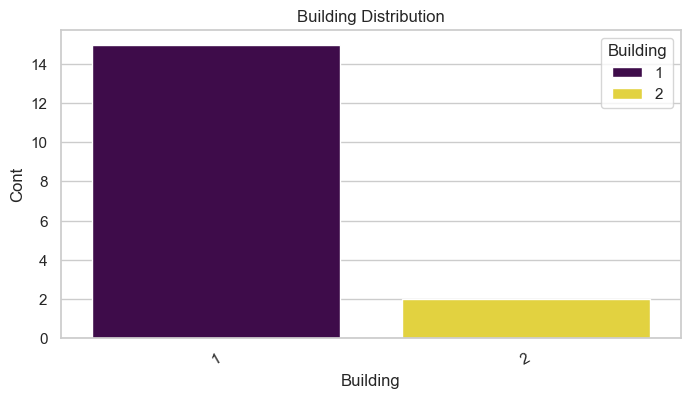

Statistic for Building:
Count of 1          is 15  . It is (88.24%)
Count of 2          is 2   . It is (11.76%)
Min: 1
Max: 2
Median: 1.0
Mode: [1]


In [42]:
i = 0
col = df_firm.columns[i]
show_info(df_firm, col)
i+=1

<font color=#5D76D9>**Тип здания**: доминирующим типом зданий являются одноэтажные объекты (Building = 1).<font/>

<font color=#5D76D9>**Фокус юридических лиц**: основная часть покупок юридических лиц приходится на недвижимость в одноэтажных зданиях, тогда как двухэтажные объекты занимают небольшую долю и выглядят менее востребованными у клиентов.<font/>

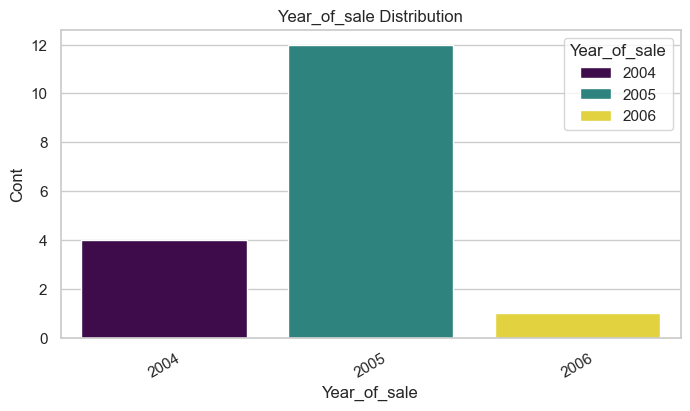

Statistic for Year_of_sale:
Count of 2004       is 4   . It is (23.53%)
Count of 2005       is 12  . It is (70.59%)
Count of 2006       is 1   . It is (5.88%)
Min: 2004
Max: 2006
Median: 2005.0
Mode: [2005]


In [43]:
col = df_firm.columns[i]
show_info(df_firm, col)
i+=1

<font color=#5D76D9>**Активность по годам продаж**: 2005 год является наиболее активным по количеству сделок, на него приходится около 70,59% всех продаж. В 2007, 2008, 2009 и 2010 годах продажи в данных не зафиксированы, что может говорить либо об ограниченности выборки, либо о фактическом отсутствии сделок в эти периоды.<font/>

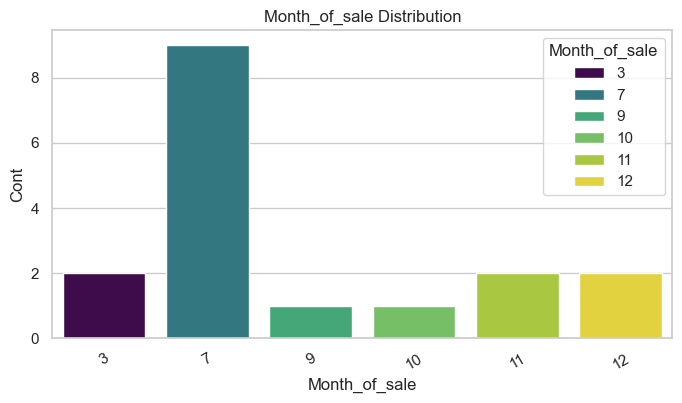

Statistic for Month_of_sale:
Count of 3          is 2   . It is (11.76%)
Count of 7          is 9   . It is (52.94%)
Count of 9          is 1   . It is (5.88%)
Count of 10         is 1   . It is (5.88%)
Count of 11         is 2   . It is (11.76%)
Count of 12         is 2   . It is (11.76%)
Min: 3
Max: 12
Median: 7.0
Mode: [7]


In [44]:
col = df_firm.columns[i]
show_info(df_firm, col)
i+=1

<font color=#5D76D9>Июль (7‑й месяц) является наиболее активным периодом, на него приходится около 52,94% всех сделок, что согласуется с модой и медианой распределения по месяцам.<font/>

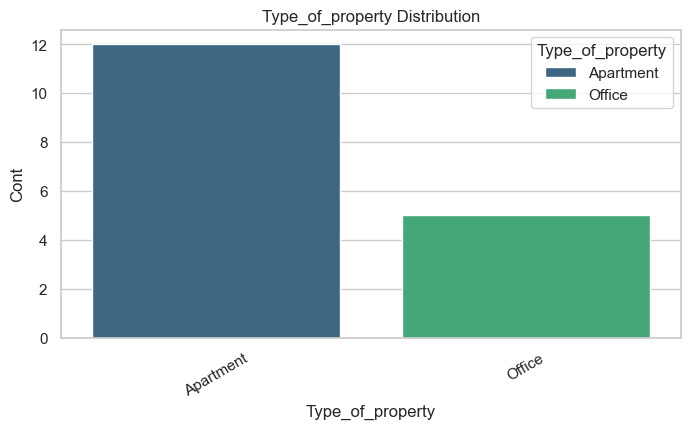

Statistic for Type_of_property:
Count of Apartment  is 12  . It is (70.59%)
Count of Office     is 5   . It is (29.41%)
Mode: ['Apartment']


In [45]:
col = df_firm.columns[i]
show_info(df_firm, col)
i+=1

<font color=#5D76D9> Сделки с квартирами формируют большую часть продаж с участием компаний. Тем не менее офисные помещения формируют хоть и меньшую, но все-таки заметную долю в продажах (почти треть от общего количества сделок).<font/>

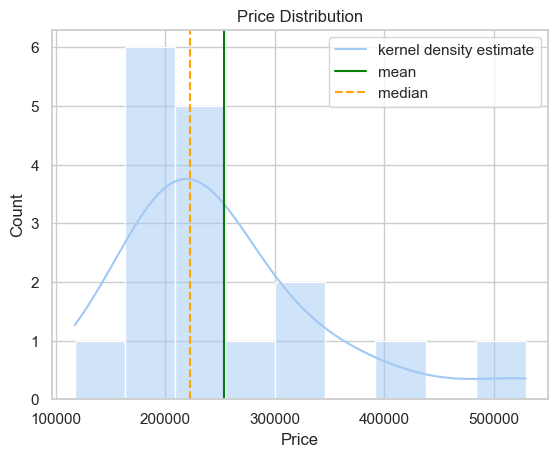

Statistic for Price:
Mean: 253405.51
Min: 117564.07
Max: 529317.28
Median: 222947.21


In [46]:
col = df_firm.columns[i]
show_info(df_firm, col)
i+=1

<font color=#5D76D9> Более низкая медиана по сравнению со средним значением говорит о том, что основная масса объектов сконцентрирована в нижней части ценового диапазона.<font/>

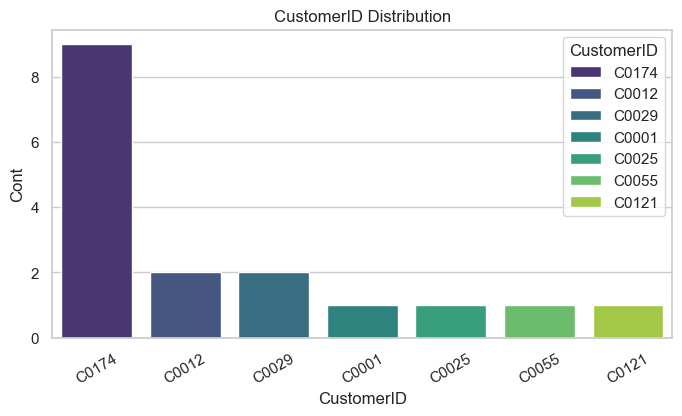

Statistic for CustomerID:
Count of C0001      is 1   . It is (5.88%)
Count of C0012      is 2   . It is (11.76%)
Count of C0025      is 1   . It is (5.88%)
Count of C0029      is 2   . It is (11.76%)
Count of C0055      is 1   . It is (5.88%)
Count of C0121      is 1   . It is (5.88%)
Count of C0174      is 9   . It is (52.94%)
Mode: ['C0174']


In [47]:
col = df_firm.columns[i]
show_info(df_firm, col)
i+=1

In [48]:
df_firm.groupby('CustomerID')['Price'].sum()

CustomerID
C0001     117564.07
C0012     581338.56
C0025     222947.21
C0029     496362.93
C0055     529317.28
C0121     169158.29
C0174    2191205.26
Name: Price, dtype: float64

<font color=#5D76D9> Клиент с идентификатором C0174 совершил 9 сделок, что соответствует 52,94% всех покупок. Этот клиент значительно доминирует в датасете, заметно опережая остальных как по количеству сделок, так и по объёму вложенных средств.<font/>

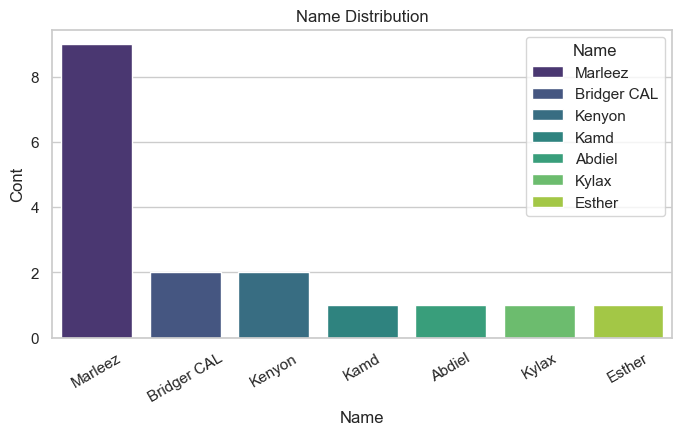

Statistic for Name:
Count of Abdiel     is 1   . It is (5.88%)
Count of Bridger CAL is 2   . It is (11.76%)
Count of Esther     is 1   . It is (5.88%)
Count of Kamd       is 1   . It is (5.88%)
Count of Kenyon     is 2   . It is (11.76%)
Count of Kylax      is 1   . It is (5.88%)
Count of Marleez    is 9   . It is (52.94%)
Mode: ['Marleez']


In [49]:
col = df_firm.columns[i]
show_info(df_firm, col)
i+=1

<font color=#5D76D9> Основной вклад в объём сделок вносит компания Marleez, которая занимает доминирующее положение среди остальных компаний в выборке.<font/>

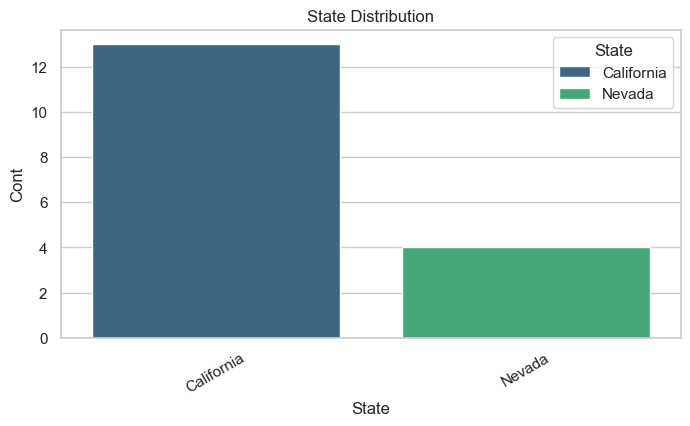

Statistic for State:
Count of California is 13  . It is (76.47%)
Count of Nevada     is 4   . It is (23.53%)
Mode: ['California']


In [50]:
col = df_firm.columns[i]
show_info(df_firm, col)
i+=1

<font color=#5D76D9> Большая часть сделок с участием компаний проведена в Калифорнии, что делает ее ключевым регионом в этом сегменте для рынка недвижимости.<font/>

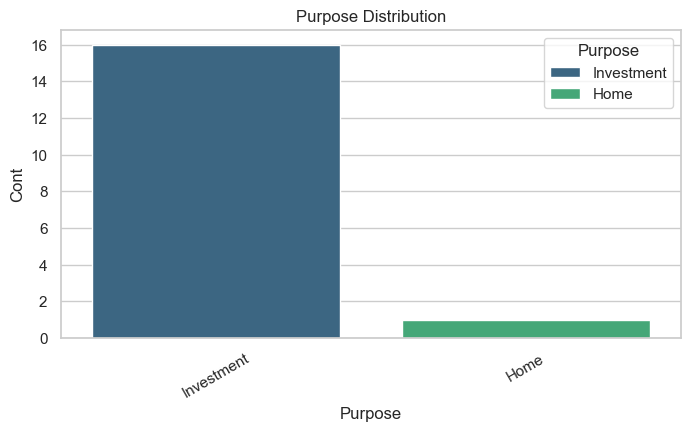

Statistic for Purpose:
Count of Home       is 1   . It is (5.88%)
Count of Investment is 16  . It is (94.12%)
Mode: ['Investment']


In [51]:
col = df_firm.columns[i]
show_info(df_firm, col)
i+=1

<font color=#5D76D9> Основной объём сделок совершается компаниями, для которых ключевой целью является инвестиция в объекты недвижимости.<font/>

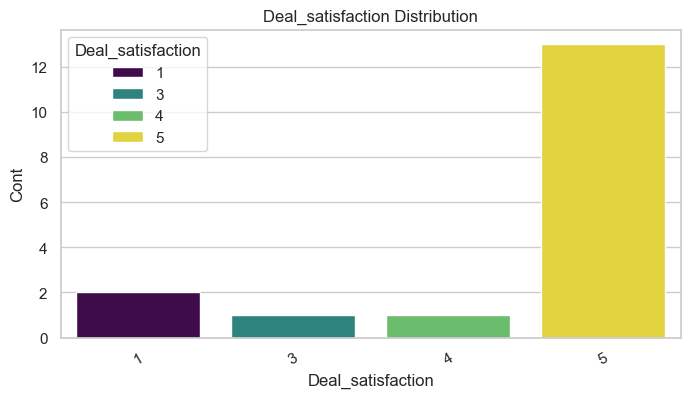

Statistic for Deal_satisfaction:
Count of 1          is 2   . It is (11.76%)
Count of 3          is 1   . It is (5.88%)
Count of 4          is 1   . It is (5.88%)
Count of 5          is 13  . It is (76.47%)
Min: 1
Max: 5
Median: 5.0
Mode: [5]


In [52]:
col = df_firm.columns[i]
show_info(df_firm, col)
i+=1

<font color=#5D76D9> Высокий уровень удовлетворённости клиентов свидетельствует о высоком доверии к компании и стабильном качестве заключаемых сделок.<font/>

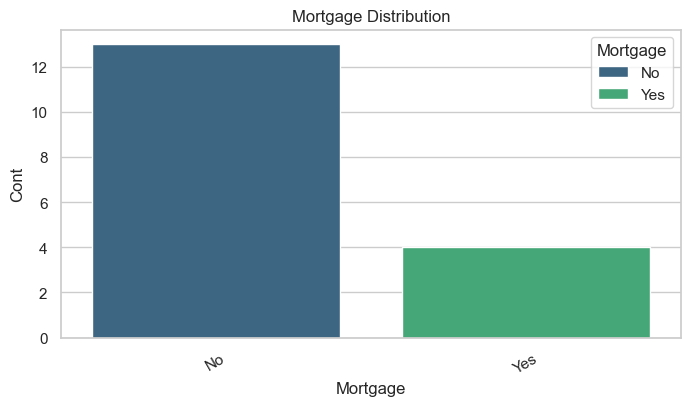

Statistic for Mortgage:
Count of No         is 13  . It is (76.47%)
Count of Yes        is 4   . It is (23.53%)
Mode: ['No']


In [53]:
col = df_firm.columns[i]
show_info(df_firm, col)
i+=1

<font color=#5D76D9> Большинство клиентов компании оплачивают сделки собственными средствами без ипотеки, что указывает на их высокую платёжеспособность.<font/>

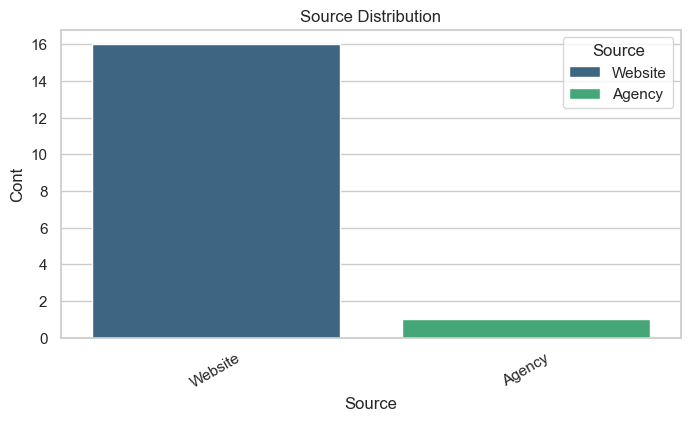

Statistic for Source:
Count of Agency     is 1   . It is (5.88%)
Count of Website    is 16  . It is (94.12%)
Mode: ['Website']


In [54]:
col = df_firm.columns[i]
show_info(df_firm, col)
i+=1

<font color=#5D76D9> Основным каналом привлечения клиентов является веб-сайт компании, что указывает на важность ее присутствия в сети Интернет.<font/>

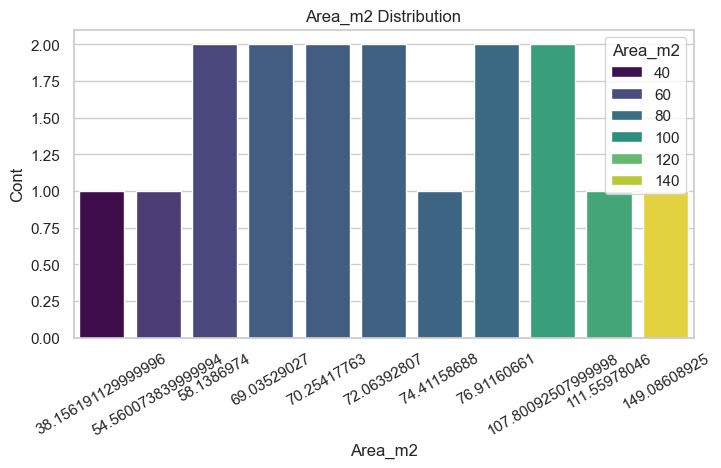

Statistic for Area_m2:
Count of 38.156191129999996 is 1   . It is (5.88%)
Count of 54.560073839999994 is 1   . It is (5.88%)
Count of 58.1386974 is 2   . It is (11.76%)
Count of 69.03529027 is 2   . It is (11.76%)
Count of 70.25417763 is 2   . It is (11.76%)
Count of 72.06392807 is 2   . It is (11.76%)
Count of 74.41158688 is 1   . It is (5.88%)
Count of 76.91160661 is 2   . It is (11.76%)
Count of 107.80092507999998 is 2   . It is (11.76%)
Count of 111.55978046 is 1   . It is (5.88%)
Count of 149.08608925 is 1   . It is (5.88%)
Mean: 78.60
Min: 38.156191129999996
Max: 149.08608925
Median: 72.06392807


In [55]:
col = df_firm.columns[i]
show_info(df_firm, col)
i+=1

<font color=#5D76D9> Большинство сделок совершается с объектами площадью от 60 до 100 м2, что указывает на то, что клиенты в основном отдают свое к средним по площади объектам.<font/>

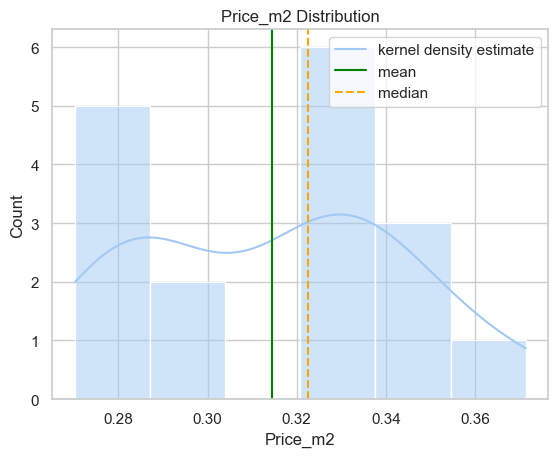

Statistic for Price_m2:
Mean: 0.31
Min: 0.2702431708407012
Max: 0.3713334593942069
Median: 0.3225385752007779


In [56]:
col = df_firm.columns[i]
show_info(df_firm, col)
i+=1

<font color=#5D76D9> Небольшая разница между минимальным и максимальным значением цены за 1 м2 указывает на схожесть параметров, влияющих на цену объекта.<font/>

<font color=#5D76D9> **Выводы по блоку "ЮРИДИЧЕСКИЕ ЛИЦА"**
<br>1.	Калифорния выступает основным штатом для покупок недвижимости, особенно объектов в одноэтажных зданиях.
<br>2.	Наиболее успешным годом по объёму продаж стал 2005 год, при этом пик спроса пришёлся на июль.
<br>3.	Ключевыми направлениями на рынке недвижимости остаются квартиры и сделки с инвестиционной целью.
<br>4.	Покупатель Marleez (C0174) выделяется как лидер по числу совершённых сделок.
<br>5.	Высокая доля сделок без ипотеки (76,47%) и высокий уровень удовлетворённости компаний указывают на стабильный и надёжный характер операций.
<br>6.	Веб‑сайт подтверждает свою эффективность как основной канал привлечения лидов, обеспечивая значительную часть успешных сделок.
.<font/>

<h2 style="font-size: 28px; color: #5D76D9; font-weight: bold;">
Изучение целевого клиента</h2>
<h2 style="font-size: 20px; color: #5D76D9; font-weight: bold;">
ФИЗИЧЕСКИЕ ЛИЦА ('Entity == 'Individual')</h2>

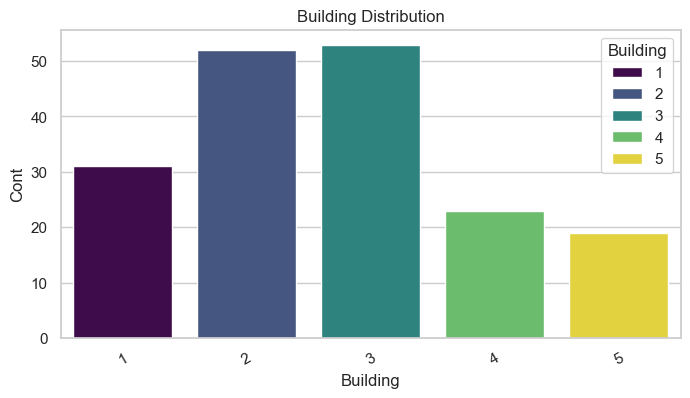

Statistic for Building:
Count of 1          is 31  . It is (17.42%)
Count of 2          is 52  . It is (29.21%)
Count of 3          is 53  . It is (29.78%)
Count of 4          is 23  . It is (12.92%)
Count of 5          is 19  . It is (10.67%)
Min: 1
Max: 5
Median: 3.0
Mode: [3]


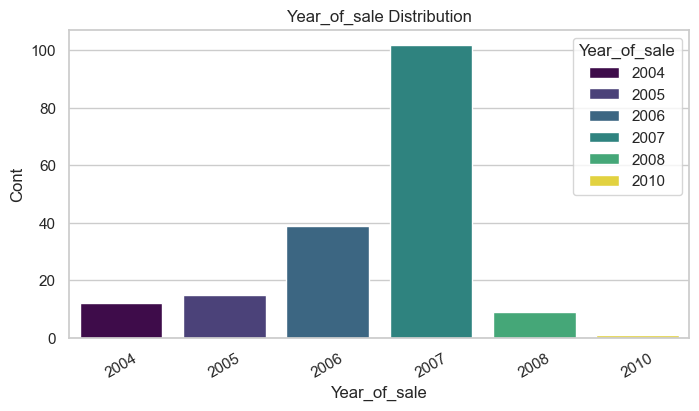

Statistic for Year_of_sale:
Count of 2004       is 12  . It is (6.74%)
Count of 2005       is 15  . It is (8.43%)
Count of 2006       is 39  . It is (21.91%)
Count of 2007       is 102 . It is (57.30%)
Count of 2008       is 9   . It is (5.06%)
Count of 2010       is 1   . It is (0.56%)
Min: 2004
Max: 2010
Median: 2007.0
Mode: [2007]


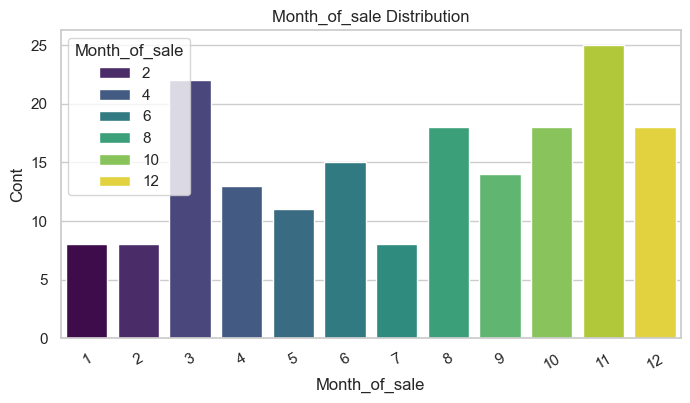

Statistic for Month_of_sale:
Count of 1          is 8   . It is (4.49%)
Count of 2          is 8   . It is (4.49%)
Count of 3          is 22  . It is (12.36%)
Count of 4          is 13  . It is (7.30%)
Count of 5          is 11  . It is (6.18%)
Count of 6          is 15  . It is (8.43%)
Count of 7          is 8   . It is (4.49%)
Count of 8          is 18  . It is (10.11%)
Count of 9          is 14  . It is (7.87%)
Count of 10         is 18  . It is (10.11%)
Count of 11         is 25  . It is (14.04%)
Count of 12         is 18  . It is (10.11%)
Min: 1
Max: 12
Median: 8.0
Mode: [11]


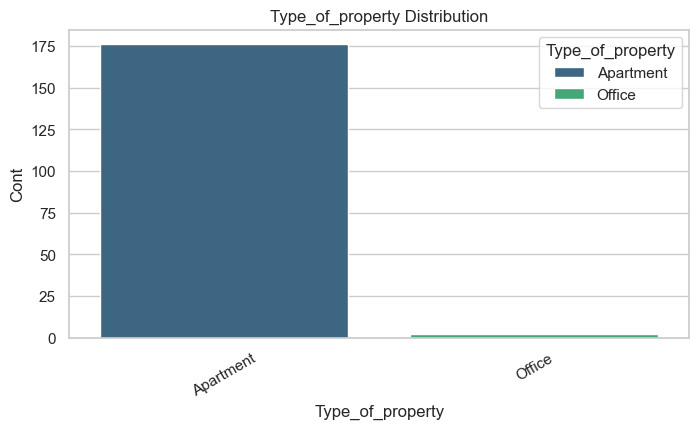

Statistic for Type_of_property:
Count of Apartment  is 176 . It is (98.88%)
Count of Office     is 2   . It is (1.12%)
Mode: ['Apartment']


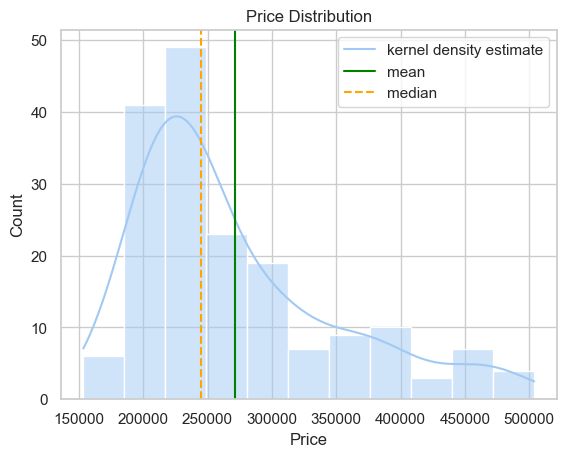

Statistic for Price:
Mean: 270965.43
Min: 153466.71
Max: 503790.23
Median: 245196.73
Mode: [460001.26]
Statistic for CustomerID:
Mode: ['C0079']
Statistic for Name:
Mode: ['Xavier']
Statistic for Surname:
Mode: ['Faulkner']


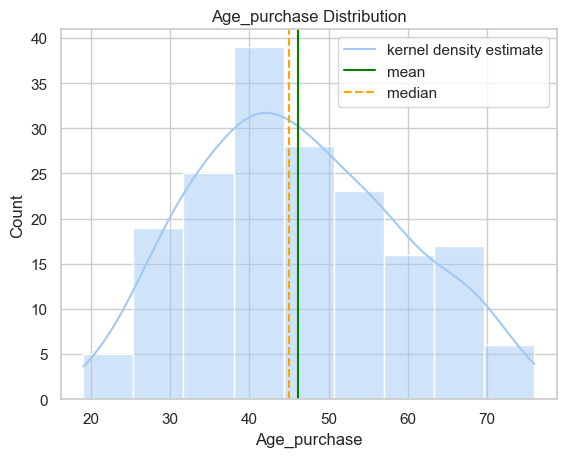

Statistic for Age_purchase:
Mean: 46.15
Min: 19.0
Max: 76.0
Median: 45.0
Mode: [48.]


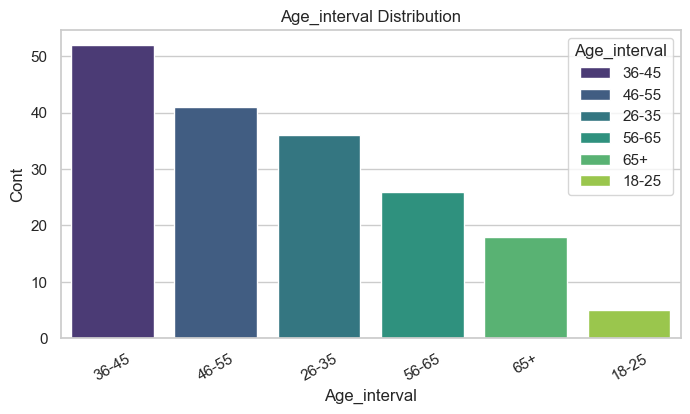

Statistic for Age_interval:
Count of 18-25      is 5   . It is (2.81%)
Count of 26-35      is 36  . It is (20.22%)
Count of 36-45      is 52  . It is (29.21%)
Count of 46-55      is 41  . It is (23.03%)
Count of 56-65      is 26  . It is (14.61%)
Count of 65+        is 18  . It is (10.11%)
Mode: ['36-45']


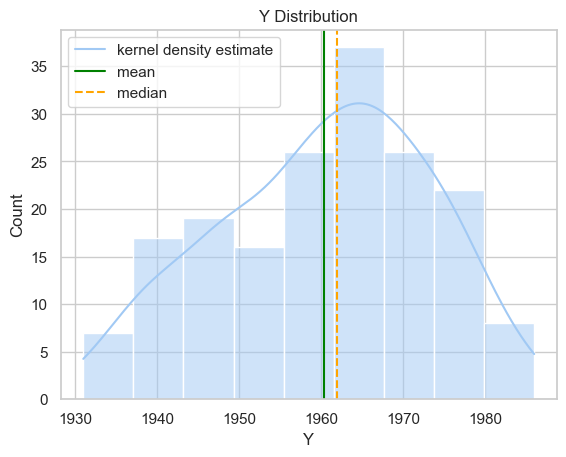

Statistic for Y:
Mean: 1960.33
Min: 1931.0
Max: 1986.0
Median: 1962.0
Mode: [1959.]


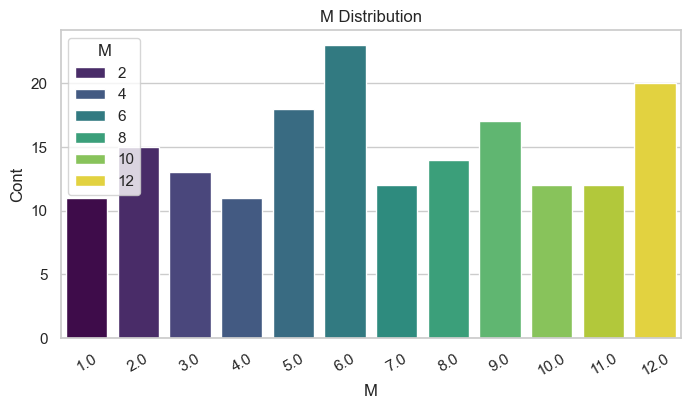

Statistic for M:
Count of 1.0        is 11  . It is (6.18%)
Count of 2.0        is 15  . It is (8.43%)
Count of 3.0        is 13  . It is (7.30%)
Count of 4.0        is 11  . It is (6.18%)
Count of 5.0        is 18  . It is (10.11%)
Count of 6.0        is 23  . It is (12.92%)
Count of 7.0        is 12  . It is (6.74%)
Count of 8.0        is 14  . It is (7.87%)
Count of 9.0        is 17  . It is (9.55%)
Count of 10.0       is 12  . It is (6.74%)
Count of 11.0       is 12  . It is (6.74%)
Count of 12.0       is 20  . It is (11.24%)
Mean: 6.70
Min: 1.0
Max: 12.0
Median: 6.0
Mode: [6.]


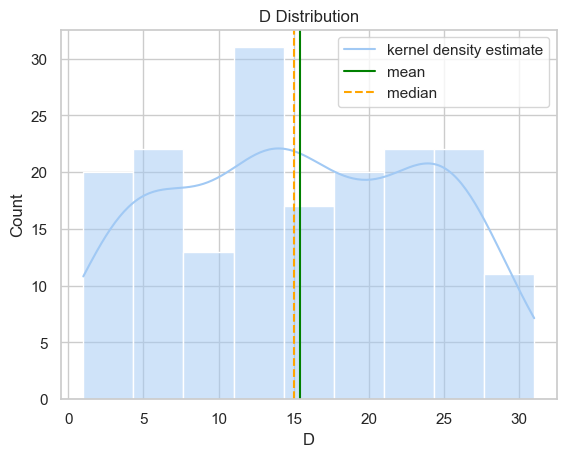

Statistic for D:
Mean: 15.45
Min: 1.0
Max: 31.0
Median: 15.0
Mode: [24.]


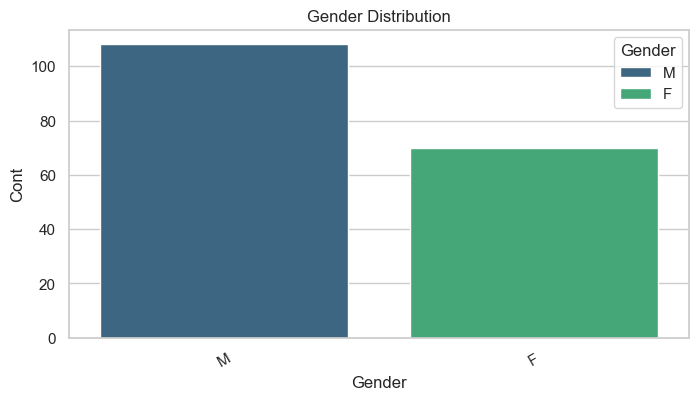

Statistic for Gender:
Count of F          is 70  . It is (39.33%)
Count of M          is 108 . It is (60.67%)
Mode: ['M']


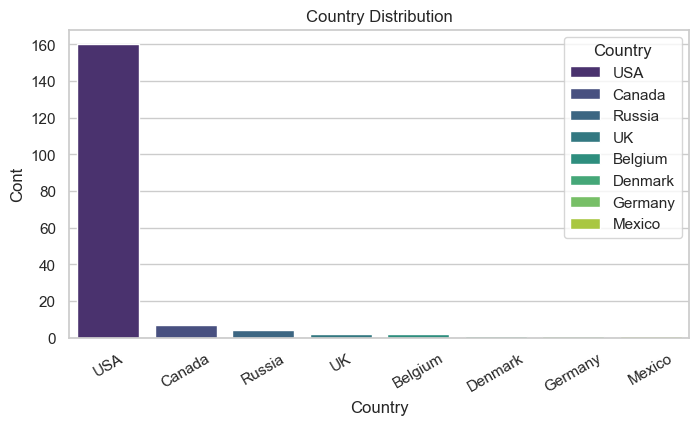

Statistic for Country:
Count of Belgium    is 2   . It is (1.12%)
Count of Canada     is 7   . It is (3.93%)
Count of Denmark    is 1   . It is (0.56%)
Count of Germany    is 1   . It is (0.56%)
Count of Mexico     is 1   . It is (0.56%)
Count of Russia     is 4   . It is (2.25%)
Count of UK         is 2   . It is (1.12%)
Count of USA        is 160 . It is (89.89%)
Mode: ['USA']


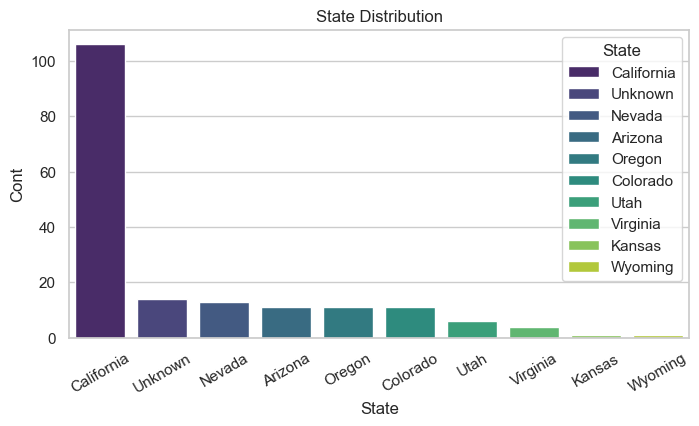

Statistic for State:
Count of Arizona    is 11  . It is (6.18%)
Count of California is 106 . It is (59.55%)
Count of Colorado   is 11  . It is (6.18%)
Count of Kansas     is 1   . It is (0.56%)
Count of Nevada     is 13  . It is (7.30%)
Count of Oregon     is 11  . It is (6.18%)
Count of Unknown    is 14  . It is (7.87%)
Count of Utah       is 6   . It is (3.37%)
Count of Virginia   is 4   . It is (2.25%)
Count of Wyoming    is 1   . It is (0.56%)
Mode: ['California']


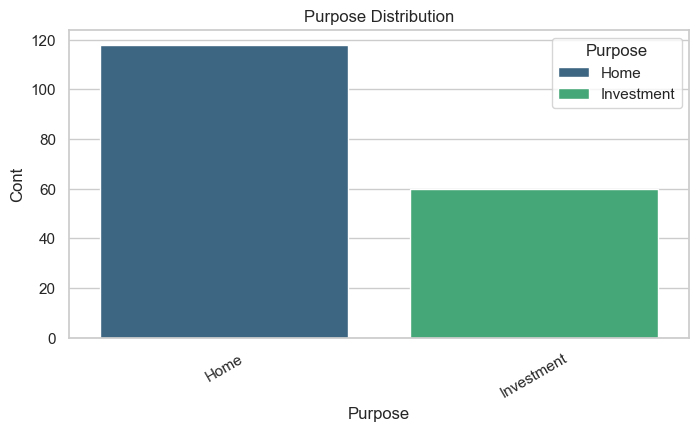

Statistic for Purpose:
Count of Home       is 118 . It is (66.29%)
Count of Investment is 60  . It is (33.71%)
Mode: ['Home']


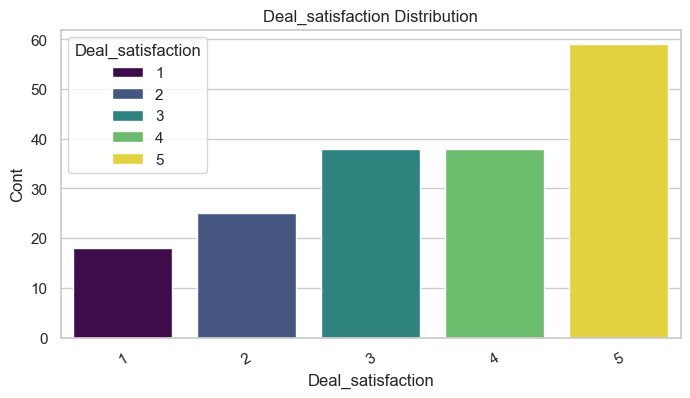

Statistic for Deal_satisfaction:
Count of 1          is 18  . It is (10.11%)
Count of 2          is 25  . It is (14.04%)
Count of 3          is 38  . It is (21.35%)
Count of 4          is 38  . It is (21.35%)
Count of 5          is 59  . It is (33.15%)
Min: 1
Max: 5
Median: 4.0
Mode: [5]


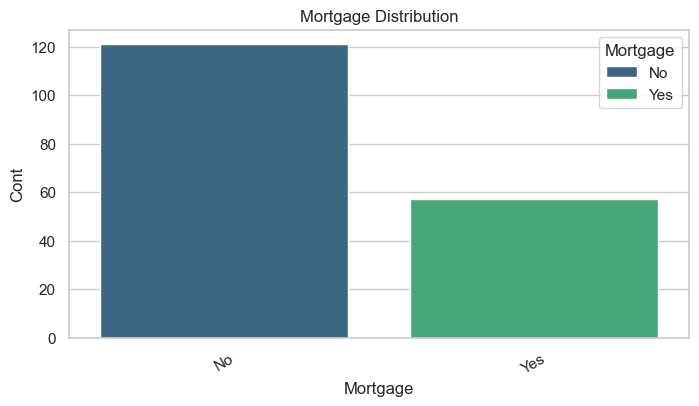

Statistic for Mortgage:
Count of No         is 121 . It is (67.98%)
Count of Yes        is 57  . It is (32.02%)
Mode: ['No']


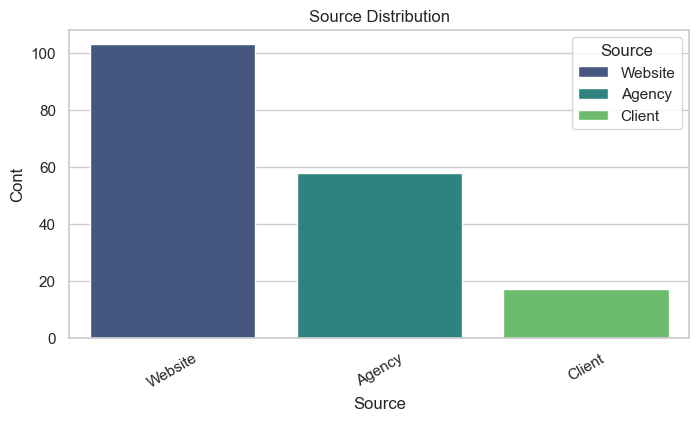

Statistic for Source:
Count of Agency     is 58  . It is (32.58%)
Count of Client     is 17  . It is (9.55%)
Count of Website    is 103 . It is (57.87%)
Mode: ['Website']


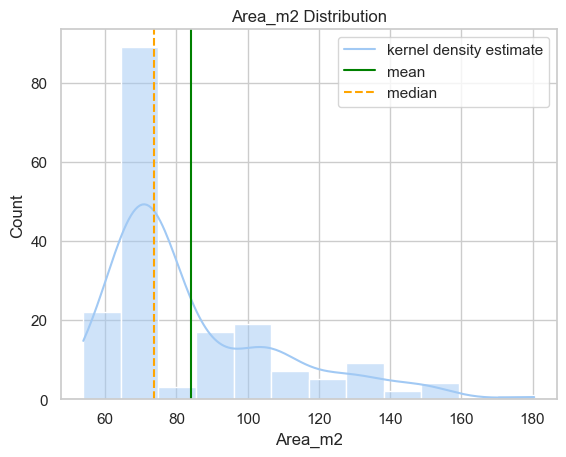

Statistic for Area_m2:
Mean: 84.08
Min: 53.86051425
Max: 180.4640775
Median: 73.62841459
Mode: [72.56374621]


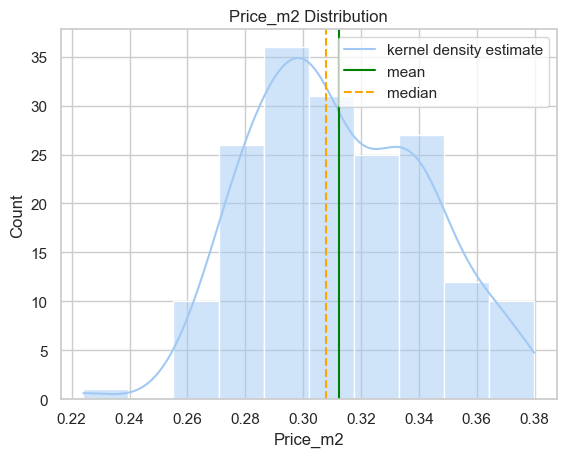

Statistic for Price_m2:
Mean: 0.31
Min: 0.22402689233938183
Max: 0.3798875396528251
Median: 0.30777817227914606


In [68]:
for col in df_individual.columns:
    if len(df_individual[col].unique())< 15:
        show_hist(df_individual,col)
        stat_cat(df_individual, col)
    elif df_individual[col].dtype != object:
        show_dist(df_individual, col)
        stat_cat(df_individual, col)
    else:
        print(f'\033[1mStatistic for {col}:\033[0;0m')
        print(f'Mode: {df_individual[col].mode().values}')

<font color=#5D76D9> **Выводы по блоку "ФИЗИЧЕСКИЕ ЛИЦА"**
<br>1.	Предпочитали приобретать недвижимость в трехэтажных (29.78%) и двухэтажных (29.21%) зданиях.
<br>2.	Пик сделок пришелся на 2007 год, когда было совершено 57.30% всех покупок, а самым активным месяцем оказался ноябрь.
<br>3.	Наибольшую популярность среди типов недвижимости имели квартиры, составляя 98.88% всех приобретений.
<br>4.	Минимальная цена за недвижимость составила 1 534 670  долларов, максимальная — 5 037 900 000 долларов, а медианная цена — 2 451 967 долларов.
<br>5.	Возраст покупателей варьировался от 19 до 76 лет.
<br>6.  Самый активный возрастной интервал составил 36-45 лет (29.21% всех сделок).
<br>7.  Среди покупателей преобладали мужчины (60.67%). 
<br>8.  89.89% всех покупателей были из США.
<br>9.  Наибольшее число сделок в Калифорнии (59.55%).
<br>10. Основной целью покупки для 66.29% клиентов было жилье.
<br>11. Только 33.15% выразили полное удовлетворение сделкой.
<br>12. 67.98% покупателей совершали покупку без ипотеки.
<br>13. Веб-сайт оказался наиболее эффективным источником лидов, обеспечив 57.87% всех сделок.
<br>14. Большинство проданных объектов среднего размера около 70 метров квадратных.
<br>15. Большинство сделок происходит в среднем ценовом сегменте.
.<font/>

<font color=#5D76D9> **ОПИСАНИЕ ЦЕЛЕВОГО КЛИЕНТА"**
<br> **Физическое лицо**
<br>Мужчина, возрастом от 36 до 45 лет, желающий приобрести жилье (квартиру), площадью 70-75 метров квадратных в США, в штате Калифорния за 2 450 000 долларов без ипотечного кредита, рассматривающий варианты на веб-сайтах.
<br>**Юридическое лицо**
<br>Компания, желающая приобрести квартиру для инвестиций, площадью от 60 до 100 метров квадратных в США, в штате Калифорния за 2 229 000 долларов без ипотечного кредита, рассматривающая варианты на веб-сайтах.
.<font/>